# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 42.7MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.21MB/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.30MB/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando apenas 1000 amostras do MNIST

Neste exemplo utilizaremos 1000 amostras de treinamento.

In [6]:
if False:
    n_samples_train = 1000

    dataset_train.train_data = dataset_train.train_data[:n_samples_train]
    dataset_train.train_labels = dataset_train.train_labels[:n_samples_train]

print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10)


In [8]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 1.0257,  0.0677,  0.8789, -0.3772,  0.3370, -0.3090,  0.2527,  1.1387,
          0.4893,  0.4198]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [13]:
n_epochs = 10
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [14]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        #print(k)
    print(f'Época: {i}/{n_epochs-1} minibatch: {k}')#.format(i,n_epochs-1))#, end='\r')


Época: 0/9 minibatch: 599
Época: 1/9 minibatch: 599
Época: 2/9 minibatch: 599
Época: 3/9 minibatch: 599
Época: 4/9 minibatch: 599
Época: 5/9 minibatch: 599
Época: 6/9 minibatch: 599
Época: 7/9 minibatch: 599
Época: 8/9 minibatch: 599
Época: 9/9 minibatch: 599


In [17]:
print('Final loss:', loss.data)

Final loss: tensor(0.1976)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

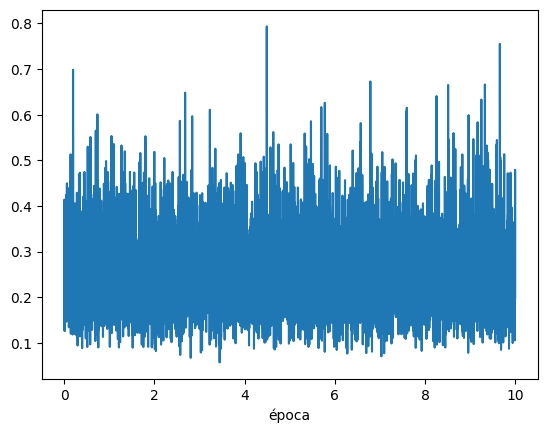

In [18]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

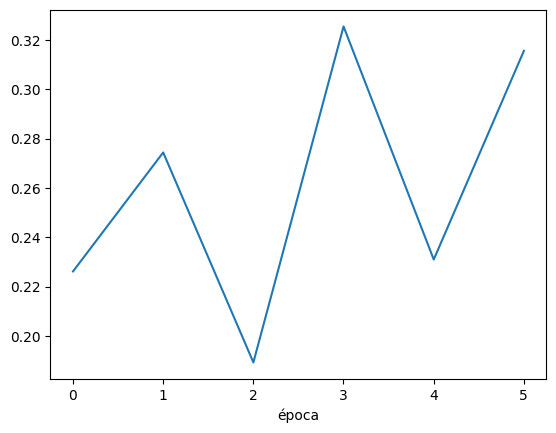

In [19]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
- 100
2. Em uma época, quantos mini-batches existem?
- 600
3. Qual é a definição de época?
- A quantidade de vezes que o laço é executado

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 3/10
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [20]:
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

n_batches_train = len(loader_train)

for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train, 1):

        # Treinamento
        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs)
        loss = criterion(outputs, Variable(y_train))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print
        if k == n_batches_train:
            print(f"Época: {i + 1}/{n_epochs}, batch: {k}")

Época: 1/10, batch: 600
Época: 2/10, batch: 600
Época: 3/10, batch: 600
Época: 4/10, batch: 600
Época: 5/10, batch: 600
Época: 6/10, batch: 600
Época: 7/10, batch: 600
Época: 8/10, batch: 600
Época: 9/10, batch: 600
Época: 10/10, batch: 600


## Conclusões sobre os experimentos deste notebook


1. O mini-batch contribui com a rapidez da convergência, num mesmo número de épocas
2. Os resultado pode ser mais ruidoso
